# MNIST Data Set - TensorFlow 1.x Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

### Visualizing the Data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

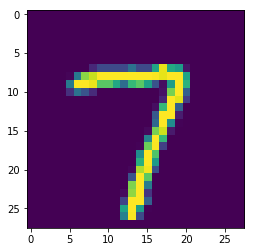

In [6]:
plt.imshow(mnist.train.images[100].reshape(28,28))

In [7]:
batch_x , batch_y = mnist.train.next_batch(100)

In [8]:
batch_x.shape

(100, 784)

In [9]:
batch_y.shape

(100, 10)

## Create the Model

In [10]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [11]:
# 10 sets of 784 weights
W = tf.Variable(tf.zeros([784,10]))

In [12]:
#10 biases - one for each neuron
b = tf.Variable(tf.zeros([10]))

In [13]:
# Net input value
I = tf.matmul(x,W) + b 

Loss and Optimizer

In [14]:
#labels
y_true = tf.placeholder(tf.float32,[None,10])

In [ ]:
#define loss function

In [15]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=I)
loss_function = tf.reduce_mean(individual_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [ ]:
#optimize the loss using gradient descent optimizer

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [17]:
train = optimizer.minimize(loss_function)

### Create Session

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(100):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    #training done...now testing
    matches = tf.equal(tf.argmax(I,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.8908
